In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state=5)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=5)

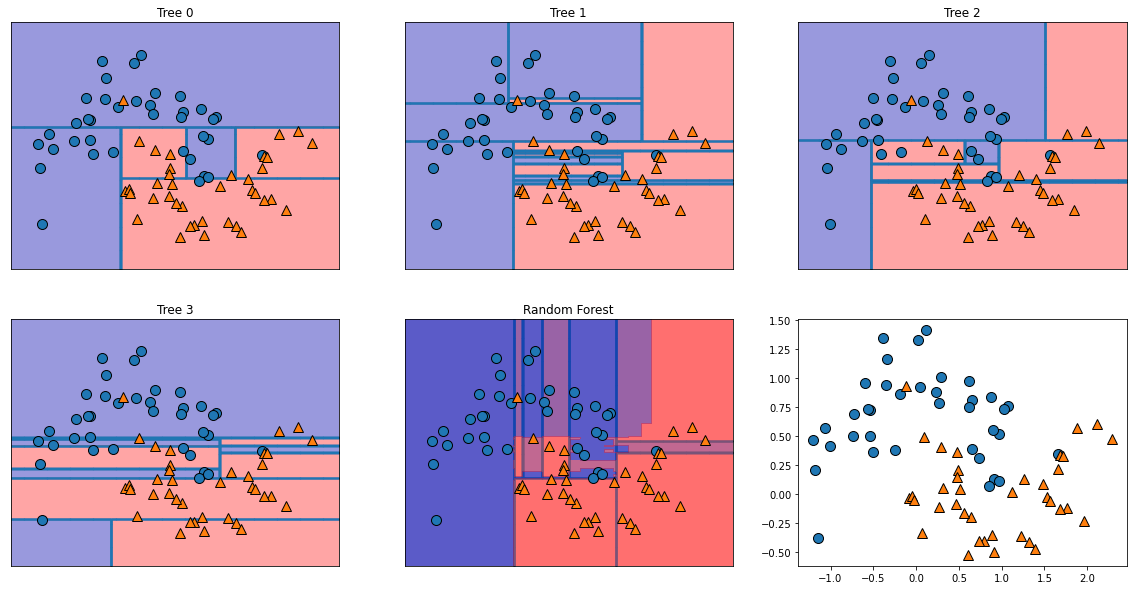

In [2]:
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,1],alpha=.4)
axes[-1,1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest.fit(X_train,y_train)
print("Accuracy on the training set: {}".format(forest.score(X_train,y_train)))
print("Accuracy on the test set: {}".format(forest.score(X_test,y_test)))

Accuracy on the training set: 0.9953051643192489
Accuracy on the test set: 0.9440559440559441


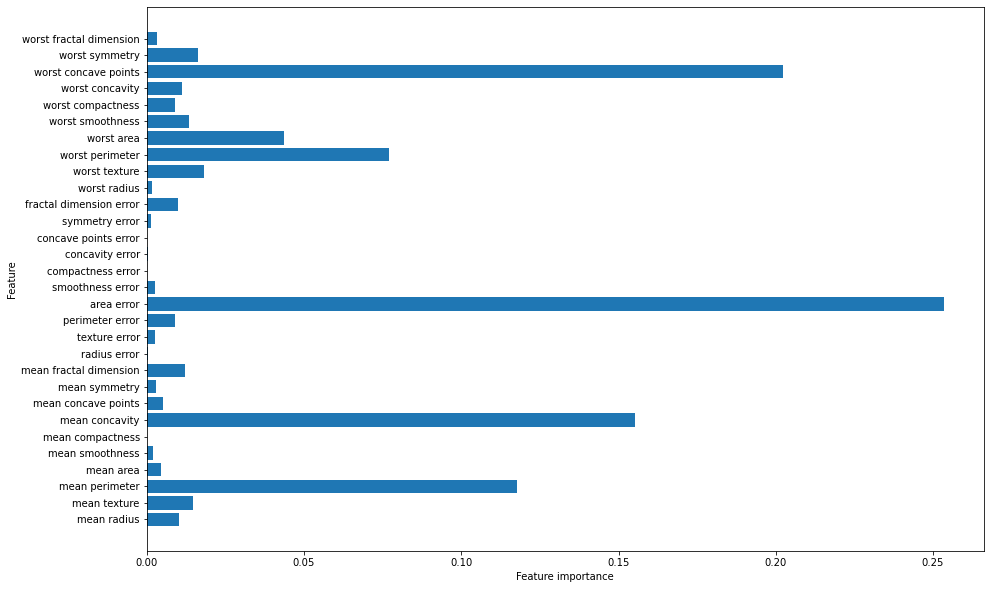

In [9]:
import numpy as np
plt.figure(figsize=(15,10))
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)